**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [2]:
df=pd.read_csv('/content/Ecommerce_Customers.csv')
df

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**EDA**

**Describe Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Cleaning Data**

In [5]:
# Check for missing values
df.isnull().sum() # No null Values

,0
Email,0
Address,0
Avatar,0
Avg Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [6]:
#Check duplicates
df.duplicated().sum() # No duplicate values

0

**Visualize Data Distribution And Outliers Detection**

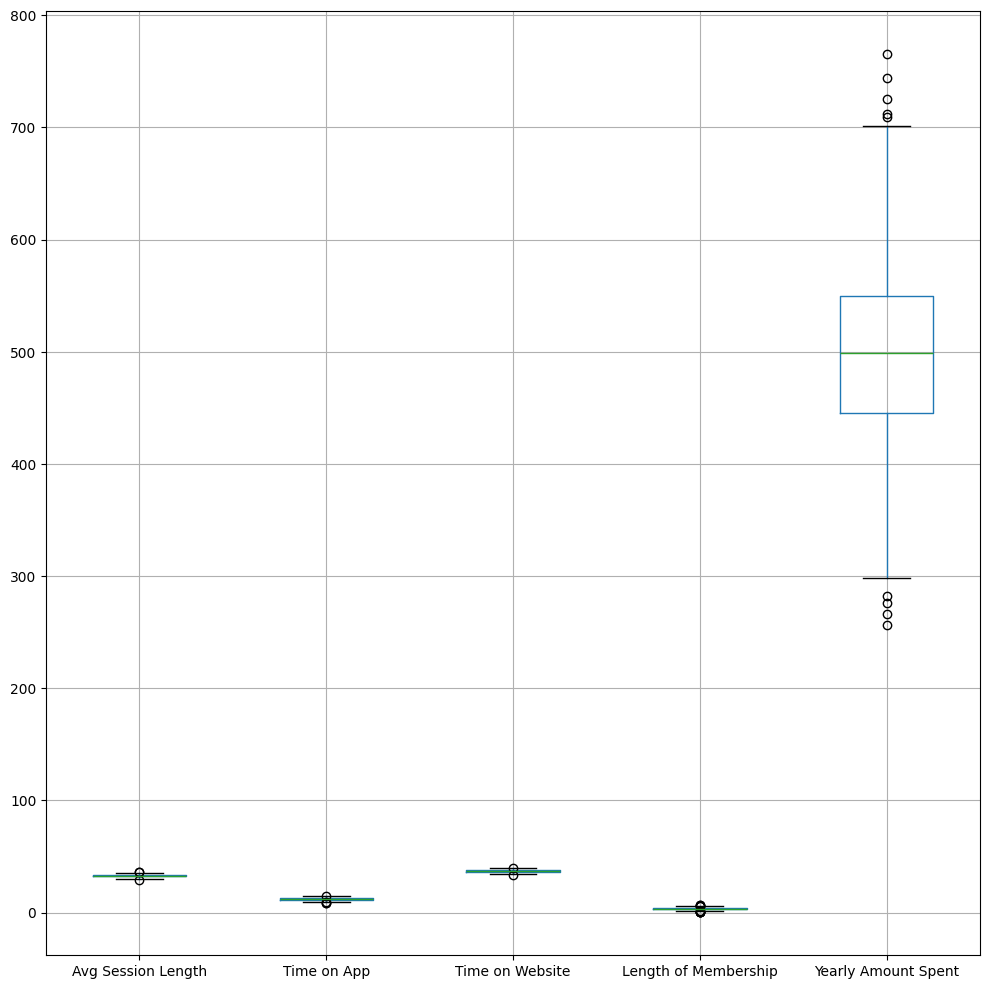

In [7]:
df.boxplot(figsize=(10,10))
plt.tight_layout()
plt.show()

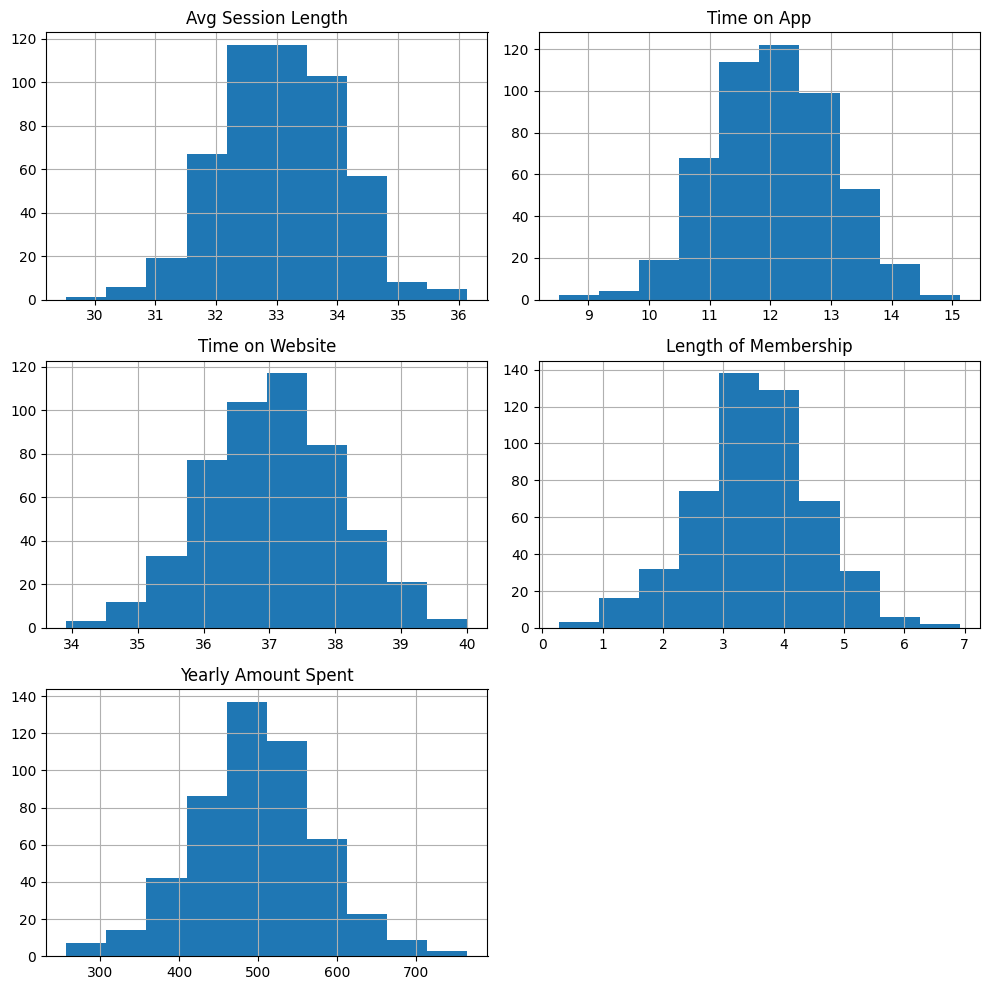

In [8]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

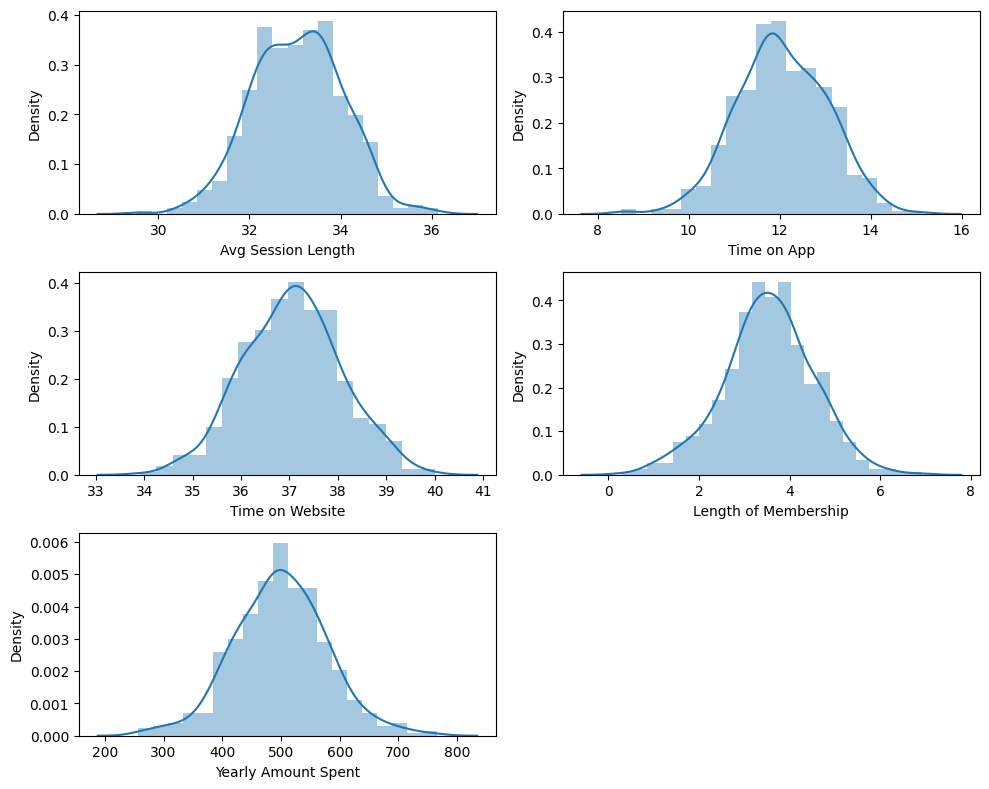

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.distplot(df['Avg Session Length'])

plt.subplot(3,2,2)
sns.distplot(df['Time on App'])

plt.subplot(3,2,3)
sns.distplot(df['Time on Website'])

plt.subplot(3,2,4)
sns.distplot(df['Length of Membership'])

plt.subplot(3,2,5)
sns.distplot(df['Yearly Amount Spent'])

plt.tight_layout()

# Skewness is looking so moderate and graph looking in uniform pattern so number of outliers are few.

In [10]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [11]:
outlier_detection(df,'Avg Session Length')

(30.286577475362737, 35.767229553109516, 32.34182200451778, 33.711985023954476)

In [12]:
outlier_detection(df,'Time on App')

(9.33960882513129, 14.802394229583687, 11.38815335180094, 12.753849702914039)

In [13]:
outlier_detection(df,'Time on Website')

(34.29849491039147, 39.76719469493466, 36.34925732959517, 37.716432275730966)

In [14]:
outlier_detection(df,'Length of Membership')

(1.136371357955959, 5.920580296370714, 2.930449709861492, 4.126501944465181)

In [15]:
outlier_detection(df,'Yearly Amount Spent')

(288.6249512402365, 705.7271533863172, 445.0382770450168, 549.313827581537)

**Correlation** **Heatmap**

In [16]:
df.corr(numeric_only=True)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

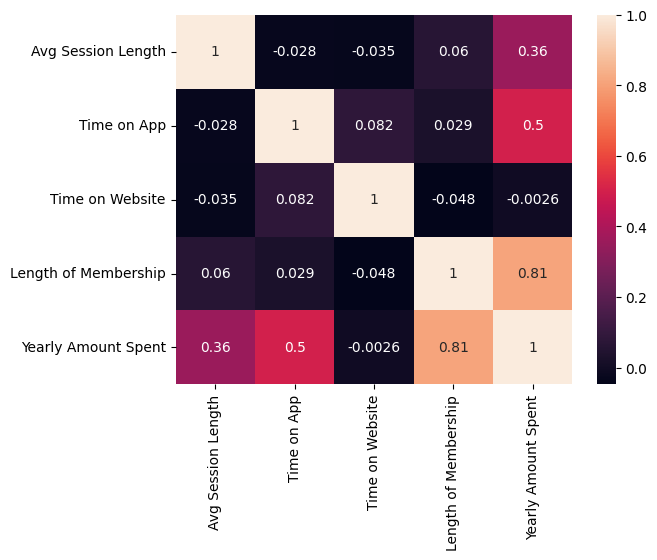

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
# colors are representing correlation value also

**Model Building**

In [18]:
# Selecting Features and Target
X = df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

**Model Evaluation**

In [22]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
# Display Model Performance
print(" Model Performance")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

 Model Performance
Mean Absolute Error: 8.558441885315247
Mean Squared Error: 109.86374118394066
R² Score: 0.9778130629184125


In [24]:
# Feature Importance
print(" Feature Coefficients")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

 Feature Coefficients
                      Coefficient
Avg Session Length      25.596259
Time on App             38.785346
Time on Website          0.310386
Length of Membership    61.896829


In [25]:
print(f"Training Accuracy: {model.score(X_train,y_train)}")
print(f"Testing Accuracy: {model.score(X_test,y_test)}")

Training Accuracy: 0.9854240629700333
Testing Accuracy: 0.9778130629184125


Text(0.5, 1.0, 'Actual vs. Predicted Spending')

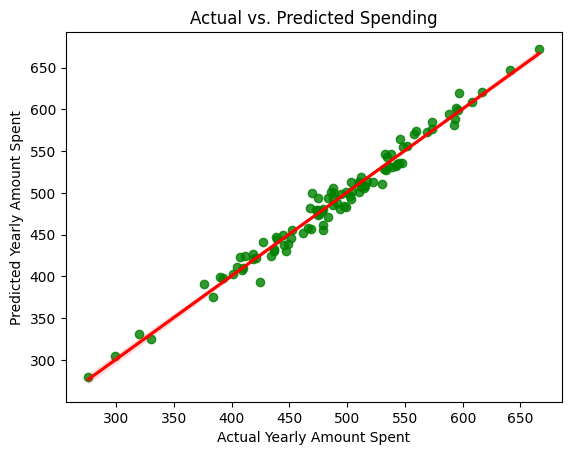

In [29]:
# Actual vs. Predicted Plot
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs. Predicted Spending")

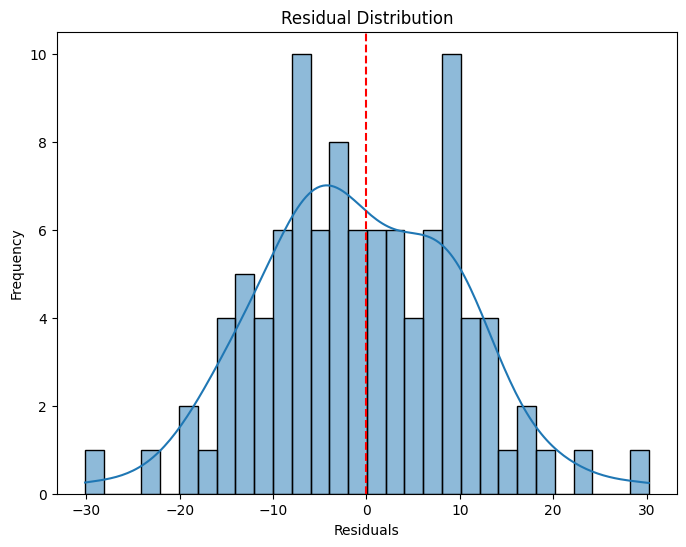

In [27]:
# Residual Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.axvline(0, color="red", linestyle="--")
plt.show()


**Feedback-**

1.High Predictive Accuracy The R² score (0.977) indicates that the model explains 97.78% of customer spending variability. Low RMSE ($10.9) suggests minimal prediction errors.

2.Key Business Insight: Length of Membership is the most influential factor in predicting yearly spending. Time on App has a stronger impact than Time on Website, implying that customers engaging with the app are more likely to spend more.

3.No Major Issues with the Model: Residuals are normally distributed, indicating no major bias. The actual vs. predicted plot shows that most predictions align closely with real values.